### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

### Loading Dataset

In [18]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Renaming the columns

In [19]:
df.rename(columns={'YearsExperience': 'Experience'}, inplace=True)
print(df.head())

   Experience   Salary
0         1.1  39343.0
1         1.3  46205.0
2         1.5  37731.0
3         2.0  43525.0
4         2.2  39891.0


### Plotting the Scatter Plot

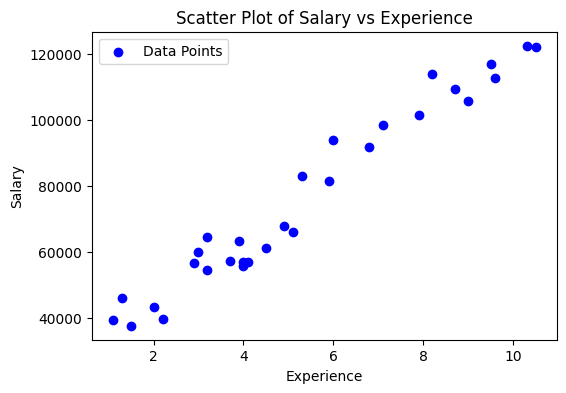

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(df["Experience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs Experience")
plt.legend()
plt.show()

### Checking Correlation

            Experience    Salary
Experience    1.000000  0.978242
Salary        0.978242  1.000000


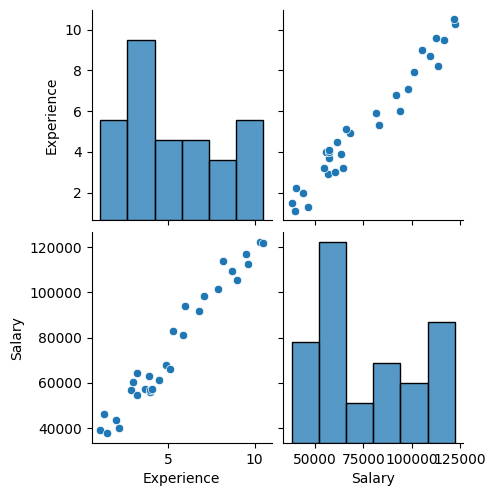

In [21]:
print(df.corr())
sns.pairplot(df)
plt.show()

### Define Independent & Dependent Variables

In [22]:
X = df[['Experience']]       # Independent variable (2D)
Y = df['Salary']             # Dependent variable (1D)

### Train-Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (22, 1)
Test Shape: (8, 1)


### Training Linear Regression Model

In [24]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

print("Coefficient (Slope):", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient (Slope): [9371.0160797]
Intercept: 25478.12743600038


In [25]:
pipeline_lr = Pipeline([
    ("lr", LinearRegression())
])

cv_scores = cross_val_score(pipeline_lr, X, Y, cv=5, scoring="r2")

print(cv_scores)
print("Mean:", cv_scores.mean())
print("Std:", cv_scores.std())

[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
Mean: -0.053364276845097036
Std: 0.6031723433172347


### Plotting Best Fit Line

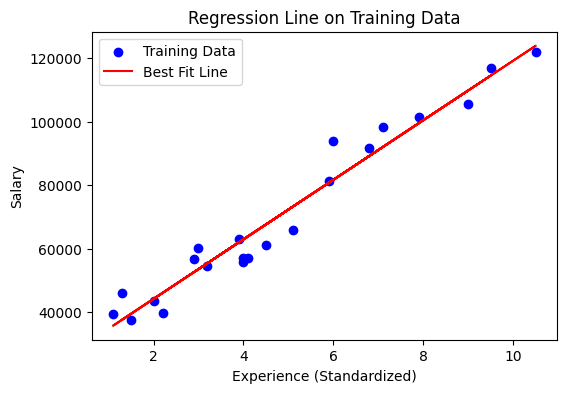

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, Y_train, color='blue', label="Training Data")
plt.plot(X_train, regression.predict(X_train), color='red', label="Best Fit Line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Regression Line on Training Data")
plt.legend()
plt.show()

### Predicting (Scaled Test Data)

In [27]:
Y_pred = regression.predict(X_test)

### Compare Actual vs Predicted

In [28]:
results = pd.DataFrame({
    "Actual Salary": Y_test.values,
    "Predicted Salary": Y_pred
})
print("\nComparison of Actual vs Predicted (first 10 rows):")
print(results.head(10))


Comparison of Actual vs Predicted (first 10 rows):
   Actual Salary  Predicted Salary
0       112635.0     115439.881801
1        67938.0      71396.106227
2       113812.0     102320.459290
3        83088.0      75144.512658
4        64445.0      55465.378891
5        57189.0      60150.886931
6       122391.0     121999.593057
7       109431.0     107005.967329


### Performance Metrics

In [29]:
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 38802588.99247065
MAE: 5056.995466663592
RMSE: 6229.172416338358
R2 Score: 0.9347210011126782


### Checking Underfitting & Overfitting

- If Train RMSE ≈ Test RMSE → ✅ healthy model
- If Train RMSE << Test RMSE → ❌ overfitting
- If Both RMSE very high → ❌ underfitting

In [30]:
# Predictions on training data
Y_train_pred = regression.predict(X_train)

# Training metrics
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

print("TRAIN RMSE:", train_rmse)
print("TRAIN R2:", train_r2)

print("TEST RMSE:", rmse)
print("TEST R2:", r2)

TRAIN RMSE: 5415.910565298476
TRAIN R2: 0.9553880313075513
TEST RMSE: 6229.172416338358
TEST R2: 0.9347210011126782


### Check visually: Residual plots

- Random cloud around zero → ✅ good fit
- Pattern / curve → ❌ underfitting
- Very tight on train but messy on test → ❌ overfitting

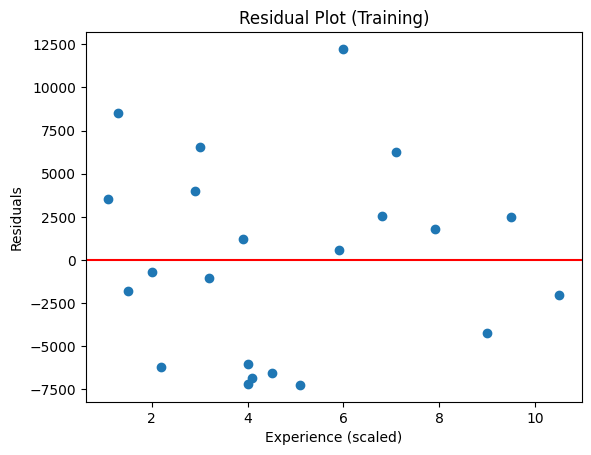

In [ ]:
train_residuals = Y_train - Y_train_pred

plt.scatter(X_train, train_residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Experience")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training)")
plt.show()

### OLS Regression

In [32]:
X_train_ols = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     428.3
Date:                Sat, 24 Jan 2026   Prob (F-statistic):           5.62e-15
Time:                        11:20:17   Log-Likelihood:                -220.35
No. Observations:                  22   AIC:                             444.7
Df Residuals:                      20   BIC:                             446.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.548e+04   2486.268     10.248      0.0